In [2]:
# Required Python Machine learning Packages
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
df_train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       header = None, delimiter=' *, *', engine='python')
df_test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1,
                       header = None, delimiter=' *, *', engine='python')

print(df_train.size)
display(df_train.head())
print(df_test.size)
display(df_test.head())

488415


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


244215


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
df_train.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [5]:
df_test.income = df_test.income.str.replace('.','')

print(df_train.size)
display(df_train.head())
print(df_test.size)
display(df_test.head())

488415


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


244215


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
def preprocessing_data(adult_df, train=True, scaled_features = {}):
    adult_df_rev = adult_df
    le = preprocessing.LabelEncoder()
    workclass_cat = le.fit_transform(adult_df.workclass)
    education_cat = le.fit_transform(adult_df.education)
    marital_cat   = le.fit_transform(adult_df.marital_status)
    occupation_cat = le.fit_transform(adult_df.occupation)
    relationship_cat = le.fit_transform(adult_df.relationship)
    race_cat = le.fit_transform(adult_df.race)
    sex_cat = le.fit_transform(adult_df.sex)
    native_country_cat = le.fit_transform(adult_df.native_country)
    income_cat = le.fit_transform(adult_df.income)
    
    #initialize the encoded categorical columns
    adult_df_rev['workclass_cat'] = workclass_cat
    adult_df_rev['education_cat'] = education_cat
    adult_df_rev['marital_cat'] = marital_cat
    adult_df_rev['occupation_cat'] = occupation_cat
    adult_df_rev['relationship_cat'] = relationship_cat
    adult_df_rev['race_cat'] = race_cat
    adult_df_rev['sex_cat'] = sex_cat
    adult_df_rev['native_country_cat'] = native_country_cat
    adult_df_rev['income_cat'] = income_cat

    #drop the old categorical columns from dataframe
    dummy_fields = ['workclass', 'education', 'marital_status', 
                      'occupation', 'relationship', 'race',
                      'sex', 'native_country', 'income']
    adult_df_rev = adult_df_rev.drop(dummy_fields, axis = 1)

    num_features = ['age', 'workclass_cat', 'fnlwgt', 'education_cat', 'education_num',
                    'marital_cat', 'occupation_cat', 'relationship_cat', 'race_cat',
                    'sex_cat', 'capital_gain', 'capital_loss', 'hours_per_week',
                    'native_country_cat']

    for each in num_features:
        if (train):
            mean, std = adult_df_rev[each].mean(), adult_df_rev[each].std()
            scaled_features[each] = [mean, std]
            
        adult_df_rev.loc[:, each] = (adult_df_rev[each] - scaled_features[each][0])/scaled_features[each][1]

    return adult_df_rev[num_features], adult_df_rev.income_cat, scaled_features

In [7]:
df_train_x, df_train_y, scaled_features = preprocessing_data(df_train)
display(df_train_x.head())
df_test_x, df_test_y, _ = preprocessing_data(df_test, False, scaled_features)
display(df_test_x.head())

,age,workclass_cat,fnlwgt,education_cat,education_num,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,capital_gain,capital_loss,hours_per_week,native_country_cat
0,0.030670,2.150546,-1.063594,-0.335432,1.134721,0.921620,-1.317789,-0.277801,0.393661,0.703061,0.148451,-0.216656,-0.035429,0.291564
1,0.837096,1.463713,-1.008692,-0.335432,1.134721,-0.406206,-0.608377,-0.900167,0.393661,0.703061,-0.145918,-0.216656,-2.222119,0.291564
2,-0.042641,0.090049,0.245075,0.181329,-0.420053,-1.734032,-0.135436,-0.277801,0.393661,0.703061,-0.145918,-0.216656,-0.035429,0.291564
3,1.057031,0.090049,0.425795,-2.402474,-1.197440,-0.406206,-0.135436,-0.900167,-1.962591,0.703061,-0.145918,-0.216656,-0.035429,0.291564
4,-0.775756,0.090049,1.408154,-0.335432,1.134721,-0.406206,0.810446,2.211664,-1.962591,-1.422309,-0.145918,-0.216656,-0.035429,-4.054160


,age,workclass_cat,fnlwgt,education_cat,education_num,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,capital_gain,capital_loss,hours_per_week,native_country_cat
0,-0.995690,0.090049,0.350769,-2.402474,-1.197440,0.921620,0.101034,0.966932,-1.962591,0.703061,-0.145918,-0.216656,-0.035429,0.163749
1,-0.042641,0.090049,-0.947081,0.181329,-0.420053,-0.406206,-0.371907,-0.900167,0.393661,0.703061,-0.145918,-0.216656,0.774456,0.163749
2,-0.775756,-1.283615,1.394341,-0.852192,0.746028,-0.406206,1.046916,-0.900167,0.393661,0.703061,-0.145918,-0.216656,-0.035429,0.163749
3,0.397227,0.090049,-0.279066,1.214850,-0.031360,-0.406206,0.101034,-0.900167,-1.962591,0.703061,0.895070,-0.216656,-0.035429,0.163749
4,-1.508871,-2.657280,-0.817446,1.214850,-0.031360,0.921620,-1.554259,0.966932,0.393661,-1.422309,-0.145918,-0.216656,-0.845314,0.163749


Accuracy for 19 is 0.8384005896443707


Text(0,0.5,'Accuracy')

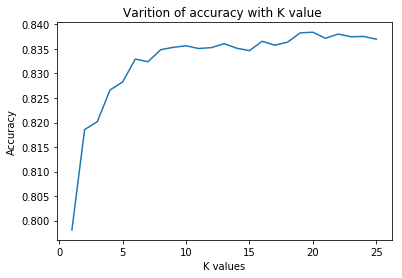

In [19]:
k_values = np.arange(1,26)
scores = []

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(df_train_x, df_train_y)
    y_predict = clf.predict(df_test_x)
    scores.append(metrics.accuracy_score(df_test_y,y_predict))

print("Accuracy for {} is {}".format(np.argmax(scores),max(scores)))

plt.plot(np.arange(1,26),scores)
plt.title('Varition of accuracy with K value ')
plt.xlabel('K values')
plt.ylabel('Accuracy')

Accuracy for 22 is 0.837172163871998


Text(0,0.5,'Accuracy')

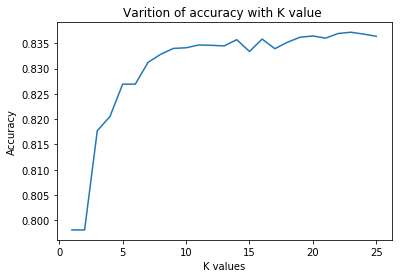

In [9]:
k_values = np.arange(1,26)
scores = []

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    clf.fit(df_train_x, df_train_y)
    y_predict = clf.predict(df_test_x)
    scores.append(metrics.accuracy_score(df_test_y,y_predict))

print("Accuracy for {} is {}".format(np.argmax(scores),max(scores)))

plt.plot(np.arange(1,26),scores)
plt.title('Varition of accuracy with K value ')
plt.xlabel('K values')
plt.ylabel('Accuracy')